#  <span style='color:indianred'>  Tweets Network Analysis </span>

##  <span style='color:tomato'>  1. Install required packages </span>

In [48]:
install.packages("rlist")
install.packages("rtweet")

also installing the dependency ‘XML’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


##  <span style='color:tomato'>  2. Load required packages </span>

In [49]:
library(rtweet)
library(ggplot2)
library(igraph)
library(jsonlite)
library(rlist)
#library(ggraph)
#library(tidygraph)

##  <span style='color:tomato'>  3. Get data from Twitter </span>

In [136]:
rt <- search_tweets("#WWDC2020", n = 2000, include_rts = TRUE)

Explore Tweets content

In [137]:
head(rt,3)

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
124755532,1275172873519403008,2020-06-22 21:04:39,aysenurbassarac,"Dünyanın en zengin şirketlerinden birisin, ama bazı özelliklerini sadece 3 ülkeye açıyorsun, diğer ülkeleri senelerce bekletiyorsun. #WWDC2020",Twitter Web App,140,NA,NA,NA,...,3390,1716,2010-03-20 13:09:16,FALSE,NA,NA,NA,NA,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/1204876237673521154/6qDmrL5R_normal.jpg
1219392382283571200,1275172872202289152,2020-06-22 21:04:38,xdxanaxx,My 1st gen Airpods watching me order the Airpods Pro #WWDC2020 https://t.co/4TNVnyGemr,Twitter for iPhone,103,NA,NA,NA,...,1333,1388,2020-01-20 22:53:06,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/1219392382283571200/1591465612,NA,http://pbs.twimg.com/profile_images/1272636437368721408/s5gBNs8Z_normal.jpg
741464232345112576,1275172870717652992,2020-06-22 21:04:38,Matheus_smaug,a Samsung vendo a Apple atualizar iPhone de 2015 pro IOS 14 #WWDC2020 https://t.co/zFSonIYC1S,Twitter for iPhone,109,NA,NA,NA,...,823,24921,2016-06-11 02:57:03,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/741464232345112576/1580866873,NA,http://pbs.twimg.com/profile_images/1258653049364545536/h30bqLiZ_normal.jpg


##  <span style='color:tomato'>  4. Transform data into network format </span>

In [138]:
rt_net <- network_graph(rt)

In [139]:
rt_net

IGRAPH 8b1aa4d DN-- 2035 3615 -- 
+ attr: id (v/c), name (v/c), type (e/c)
+ edges from 8b1aa4d (vertex names):
 [1] aysenurbassarac->seyfoyun        xdxanaxx       ->the1maurice    
 [3] Matheus_smaug  ->_slinkyboy      mohammadfahimbd->2ndJaden       
 [5] iJuau          ->_slinkyboy      rainbowstorm666->modifyinformal 
 [7] Junior_Lucas54 ->_slinkyboy      TGragnato      ->123BlessJesse  
 [9] LILBLACKONLINE ->aayush_trivedi_ elChicoTerroso ->giovaelpe      
[11] ralf_kowollik  ->SandeepKini3    ralf_kowollik  ->TwitterMoments 
[13] albsalapointer ->aligatr         arcano17       ->HAL9000_       
[15] J_0_S_7        ->JonyIveParody   J_0_S_7        ->JonyIveParody  
+ ... omitted several edges

##  <span style='color:tomato'>  5. Network Plot </span>

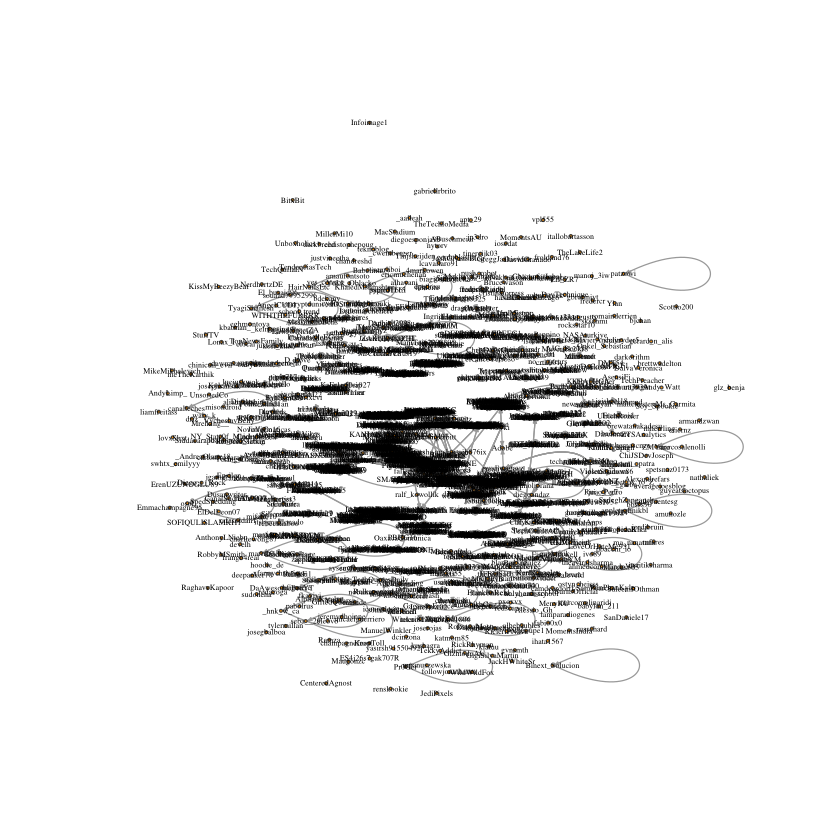

In [140]:
plot(rt_net, edge.arrow.size=.2, edge.curved=0,
     vertex.color="orange", vertex.frame.color="#555555", 
     vertex.label.color="black", vertex.label.cex=.4, vertex.size=1)

##  <span style='color:tomato'>  6. Compute and Visualize Centrality Metrics </span>

###  <span style='color:tomato'>  6.1. Who receives most information? </span>

In [141]:
deg.in <- degree(rt_net, mode = "in")
deg.in <- sort(deg.in, decreasing = T)[1:15]
deg.in

2ndJaden   atweetforpete           WIRED         viticci            CNET 
            262             156             154              98              97 
     _slinkyboy       Oddficial     the1maurice   syllahightech      happy_gal_ 
             94              94              92              84              78 
         twannl   JonyIveParody    Valeriafern_           Apple aayush_trivedi_ 
             64              62              62              58              56

###  <span style='color:tomato'>  6.2. Who is the strongest influencer? </span>

In [142]:
deg.out <- degree(rt_net, mode = "out")
deg.out <- sort(deg.out, decreasing = T)[1:15]
###  <span style='color:tomato'>  6.2. Who is the strongest influencer? </span>deg.out

DilectisG         i_van84         ItoniLl Claudet25883916      texasrecks 
             30              27              20              20              20 
      beltz_pam  David25Holland      PatriotRN3      BaronCaple          othyn_ 
             20              20              20              18              18 
        J_0_S_7         MsNtuli     usability4u  fallen_icarus_   Worlu_Rowland 
             17              16              14              13              12

###  <span style='color:tomato'>  6.3. Who makes the most connections / transmits most?</span>

In [143]:
deg.all <- degree(rt_net, mode = "all")
deg.all <- sort(deg.all, decreasing = T)[1:15]
deg.all

2ndJaden   atweetforpete           WIRED         viticci            CNET 
            262             156             154              98              97 
     _slinkyboy       Oddficial     the1maurice   syllahightech      happy_gal_ 
             94              94              92              84              78 
         twannl   JonyIveParody    Valeriafern_           Apple aayush_trivedi_ 
             64              62              62              58              56

##  <span style='color:tomato'>  7. The number of edges/connections/links in the network </span> 

In [144]:
ecount(rt_net)

[1] 3615

##  <span style='color:tomato'>  8. The number of vertices/nodes</span> 

In [145]:
vcount(rt_net)

[1] 2035

##  <span style='color:tomato'>  9. Network Density </span> 
Measure of network health and effectiveness. Describes the portion of the potential connections in a network that are actual connections.
i.e. A family reunion has high network density, but a public bus has low network density.

In [146]:
edge_density(rt_net)

[1] 0.0008733593